In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/Users/jayantkumar/Desktop/images/train'
valid_path = '/Users/jayantkumar/Desktop/images/val'

In [5]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
folders = glob('/Users/jayantkumar/Desktop/images/train/*')

In [6]:
folders

['/Users/jayantkumar/Desktop/images/train/yuzvendra_chahal',
 '/Users/jayantkumar/Desktop/images/train/vijay_shankar',
 '/Users/jayantkumar/Desktop/images/train/rohit_sharma',
 '/Users/jayantkumar/Desktop/images/train/dinesh_karthik',
 '/Users/jayantkumar/Desktop/images/train/virat_kohli',
 '/Users/jayantkumar/Desktop/images/train/kedar_jadhav',
 '/Users/jayantkumar/Desktop/images/train/kuldeep_yadav',
 '/Users/jayantkumar/Desktop/images/train/shikhar_dhawan',
 '/Users/jayantkumar/Desktop/images/train/jasprit_bumrah',
 '/Users/jayantkumar/Desktop/images/train/ms_dhoni',
 '/Users/jayantkumar/Desktop/images/train/mohammed_shami',
 '/Users/jayantkumar/Desktop/images/train/bhuvneshwar_kumar',
 '/Users/jayantkumar/Desktop/images/train/ravindra_jadeja',
 '/Users/jayantkumar/Desktop/images/train/hardik_pandya',
 '/Users/jayantkumar/Desktop/images/train/k._l._rahul']

In [7]:
len(folders)

15

In [10]:
x = Flatten()(vgg16.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
train_path = '/Users/jayantkumar/Desktop/images/train'
valid_path = '/Users/jayantkumar/Desktop/images/val'

In [16]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 397 images belonging to 15 classes.


In [17]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 179 images belonging to 15 classes.


In [18]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
13/13 [==============================] - 163s 13s/step - loss: 3.7695 - accuracy: 0.1083 - val_loss: 2.9202 - val_accuracy: 0.1844
Epoch 2/20
13/13 [==============================] - 155s 12s/step - loss: 1.9454 - accuracy: 0.4433 - val_loss: 2.5557 - val_accuracy: 0.2514
Epoch 3/20
13/13 [==============================] - 147s 11s/step - loss: 1.2673 - accuracy: 0.6121 - val_loss: 2.3775 - val_accuracy: 0.3352
Epoch 4/20
13/13 [==============================] - 147s 11s/step - loss: 0.8023 - accuracy: 0.7884 - val_loss: 2.3078 - val_accuracy: 0.4246
Epoch 5/20
13/13 [==============================] - 147s 11s/step - loss: 0.6171 - accuracy: 0.8237 - val_loss: 2.2166 - val_accuracy: 0.4134
Epoch 6/20
13/13 [==============================] - 174s 13s/step - loss: 0.3971 - accuracy: 0.9194 - val_loss: 2.0312 - val_accuracy: 0.4693
Epoch 7/20
13/13 [==============================] - 155s 12s/step - loss

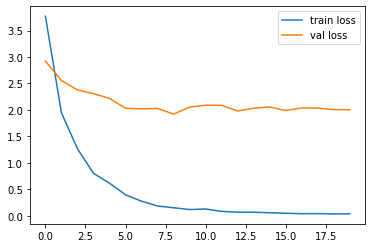

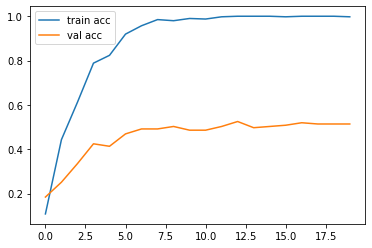

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('cricket2_vgg16.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
print(y_pred)

[[6.88721542e-04 1.94309905e-04 1.11186260e-03 ... 1.15784293e-03
  7.74212749e-05 1.57181094e-05]
 [1.85058601e-02 5.82481883e-02 5.55676371e-02 ... 4.73615946e-03
  1.29798844e-01 2.18906496e-02]
 [2.36634482e-02 3.14746541e-03 3.06096822e-02 ... 4.55479790e-03
  4.41699699e-02 2.04796903e-03]
 ...
 [1.05951890e-01 2.00529154e-02 6.29871786e-02 ... 3.36858854e-02
  3.63673493e-02 1.83961064e-01]
 [2.22503580e-02 4.78082336e-03 4.67816681e-01 ... 9.83349280e-04
  1.11241356e-01 1.04475825e-03]
 [8.86849221e-03 2.33451021e-03 5.08427736e-04 ... 8.08064491e-02
  1.63489953e-03 1.45097019e-03]]


In [23]:
y_pred = np.argmax(y_pred, axis=1)

In [24]:
print(y_pred)

[ 8  9  4  1  3 11 10  9 13 10 13  0 12  6  2  8  5  6  9 13  5  9 10  9
  9 10  9 10  9  9  9  0 11  6  2  1  9 10  6  4 10  2 13 10  5  9 13 11
  2 12  2  8  9  9 10 13 13 10  0 10  9  4 10  2  6  7 11 11  6 10  8  6
  9 13 11 12 10  4  1 14 13  8  6 10  7  5  9 10 11  1  7  1 12  3  1  5
  7  9  9  5 13  9  0  8  2 10  9  9 12 13  0  5 13 10  2  5  8 11  9 14
  2 12  9 10  8  2  8  5 11  6 11  5 10 14  8 11 11  2 14  9  5 10 11  2
  3 14  4 11  5 13 11 10  5  9  8 14  4 11  1 10  9 11  1 11  2  6  5  3
 10 14  6  8 13  4 11  8  4  2  6]


# Level1

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [9]:
model=load_model('cricket2_vgg16.h5')

In [10]:
def classes_pred(x):
    if(x == 0):
        print("Predicted Player : bhuvneshwar_kumar")
    elif(x == 1):
        print("Predicted Player : dinesh_karthik")
    elif(x == 2):
        print("Predicted Player : hardik_pandya")
    elif(x == 3):
        print("Predicted Player : jasprit_bumrah")    
    elif(x == 4):
        print("Predicted Player : k._l._rahul")    
    elif(x == 5):
        print("Predicted Player : kedar_jadhav")
    elif(x == 6):
        print("Predicted Player : kuldeep_yadav")    
    elif(x == 7):
        print("Predicted Player : mohammed_shami")    
    elif(x == 8):
        print("Predicted Player : ms_dhoni")    
    elif(x == 9):
        print("Predicted Player : ravindra_jadeja") 
    elif(x == 10):
        print("Predicted Player : rohit_sharma")
    elif(x == 11):
        print("Predicted Player : shikhar_dhawan")
    elif(x == 12):
        print("Predicted Player : vijay_shankar")    
    elif(x == 13):
        print("Predicted Player : virat_kohli")    
    elif(x == 14):
        print("Predicted Player : yuzvendra_chahal")
    
    
    
   

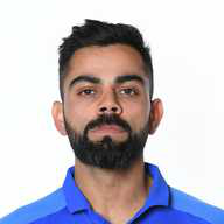

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/Users/jayantkumar/Desktop/Virat Kohli.jpeg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [12]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [13]:
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
y_pred = np.argmax(y, axis=1)

[13]
Predicted Player : virat_kohli


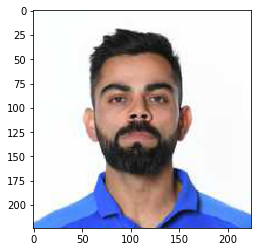

In [14]:
print((y_pred))
classes_pred(y_pred)
plt.imshow(img)

[13]
AxesImage(54,36;334.8x217.44)


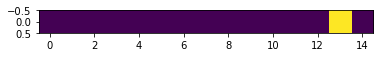

In [15]:
print((y_pred))
print(plt.imshow(y))

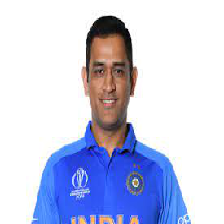

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/Users/jayantkumar/Desktop/dhoni1.jpeg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [17]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [18]:
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
y_pred = np.argmax(y, axis=1)

[8]
Predicted Player : ms_dhoni


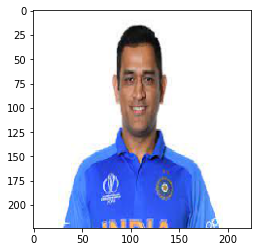

In [19]:
print((y_pred))
classes_pred(y_pred)
plt.imshow(img)

[8]
AxesImage(54,36;334.8x217.44)


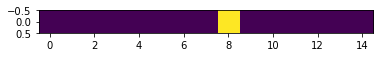

In [20]:
print((y_pred))
print(plt.imshow(y))

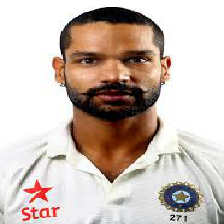

In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/Users/jayantkumar/Desktop/sd1.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [22]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [23]:
img_data=preprocess_input(x)
img_data.shape
y=model.predict(img_data)
y_pred = np.argmax(y, axis=1)

[11]
Predicted Player : shikhar_dhawan


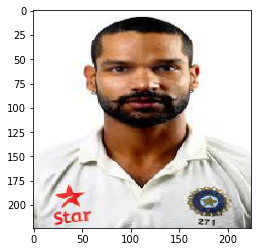

In [24]:
print((y_pred))
classes_pred(y_pred)
plt.imshow(img)

[11]
AxesImage(54,36;334.8x217.44)


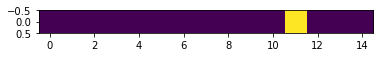

In [25]:
print((y_pred))
print(plt.imshow(y))

# Level2

In [26]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [27]:
def face_extractor(img):
    faces = face_cascade.detectMultiScale(img,1.3,5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face

In [ ]:
from PIL import Image
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224,224))
        im = Image.fromarray(face,'RGB')
        img_array = np.array(im)
        img_array = np.expand_dims(img_array, axis=0)
        pred =model.predict(img_array)
        pred1 = np.argmax(pred, axis=1)
        name  = classes_pred(pred1)
        
        if(pred1 == 0):
            y = "Predicted Player : bhuvneshwar_kumar"
        elif(pred1 == 1):
            y = "Predicted Player : dinesh_karthik"
        elif(pred1 == 2):
            y = "Predicted Player : hardik_pandya"
        elif(pred1 == 3):
            y = "Predicted Player : jasprit_bumrah"   
        elif(pred1 == 4):
            y = "Predicted Player : k._l._rahul"  
        elif(pred1 == 5):
            y = "Predicted Player : kedar_jadhav"
        elif(pred1 == 6):
            y = "Predicted Player : kuldeep_yadav"    
        elif(pred1 == 7):
            y = "Predicted Player : mohammed_shami"    
        elif(pred1 == 8):
            y = "Predicted Player : ms_dhoni"    
        elif(pred1 == 9):
            y = "Predicted Player : ravindra_jadeja" 
        elif(pred1 == 10):
            y = "Predicted Player : rohit_sharma"
        elif(pred1 == 11):
            y = "Predicted Player : shikhar_dhawan"
        elif(pred1 == 12):
            y = "Predicted Player : vijay_shankar"    
        elif(pred1 == 13):
            y = "Predicted Player : virat_kohli"    
        elif(pred1 == 14):
            y = "Predicted Player : yuzvendra_chahal"
        
    
       
      
        
        if(pred1):
           
        
            cv2.putText(frame, y, (50,50), cv2.FONT_HERSHEY_COMPLEX, 1 , (0,255,0),2)
            
        
    else:
         cv2.putText(frame,"no face found", (50,50), cv2.FONT_HERSHEY_COMPLEX, 1 , (0,255,0), 2)
    cv2.imshow('Video',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()        

Predicted Player : rohit_sharma
Predicted Player : ravindra_jadeja
Predicted Player : ravindra_jadeja
Predicted Player : ravindra_jadeja
Predicted Player : ravindra_jadeja
Predicted Player : ravindra_jadeja
Predicted Player : rohit_sharma
